# Linear Regression Part (A)
## Getting the Dataset

In [1]:
# yayahada whaha
import os
import numpy as np
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

path = "./"

filename_read = os.path.join(path,"drinks.csv")
drink_Data = pd.read_csv(filename_read, na_values=['NA','?'])
drink_Data.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America
6,Argentina,193,25,221,8.3,South America
7,Armenia,21,179,11,3.8,Europe
8,Australia,261,72,212,10.4,Oceania
9,Austria,279,75,191,9.7,Europe


## Splitting Dataset to Train/Test variables

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
drink_Data['encoded_country'] = le.fit_transform(drink_Data['country'])

drink_Data[0:5]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,encoded_country
0,Afghanistan,0,0,0,0.0,Asia,0
1,Albania,89,132,54,4.9,Europe,1
2,Algeria,25,0,14,0.7,Africa,2
3,Andorra,245,138,312,12.4,Europe,3
4,Angola,217,57,45,5.9,Africa,4


In [3]:
# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(
  drink_Data[['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']], 
  drink_Data['encoded_country'], 
  test_size=0.25,
  random_state=99)
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)

print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (144, 4)
y_train shape:  (144,)
x_test shape:  (49, 4)
y_test shape:  (49,)


c:\Users\sho85\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
c:\Users\sho85\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


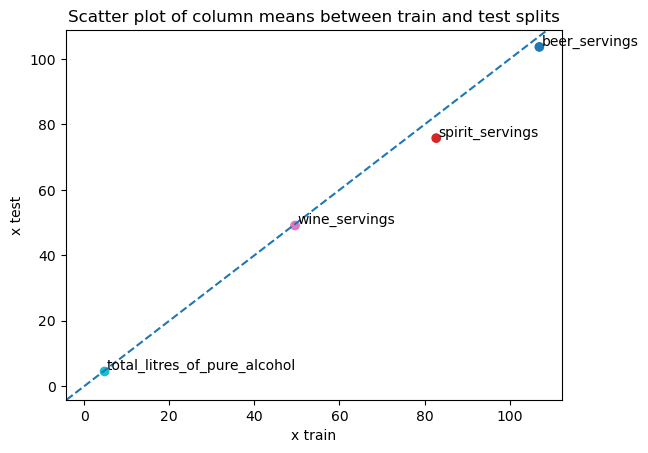

In [4]:
# Statistics for training set
x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

# Statistics for test set
x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

column_names = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
plt.scatter(x_train_mean, x_test_mean, cmap='tab10', c=range(len(column_names)))
plt.axline((1, 1), slope=1, linestyle="--")
plt.title("Scatter plot of column means between train and test splits")
plt.xlabel("x train")
plt.ylabel("x test")
for i, txt in enumerate(column_names):
    plt.annotate(txt, (x_train_mean[i], x_test_mean[i]), xytext=(x_train_mean[i]+0.5, x_test_mean[i]+0.5))

plt.show()